<a href="https://colab.research.google.com/github/Rojanna/final-year-project-Team4/blob/main/Next_word_prediction_using_LSTM_ptoject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pride and Prejudice.txt to Pride and Prejudice.txt


In [ ]:
from google.colab import files
uploaded = files.upload()

# Get the content of the uploaded file
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
lines = uploaded[file_name].decode('utf-8').splitlines()  # Decode and split into lines

data = ""

for line in lines:  # Iterate through each line
    data += line + ' '  # Join lines with spaces

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

Saving Pride and Prejudice.txt to Pride and Prejudice (1).txt


'*** START OF THE PROJECT GUTENBERG EBOOK 1342 ***                             [Illustration:                               GEORGE ALLEN                                PUBLISHER                          156 CHARING CROSS ROAD                                 LONDON                               RUSKIN HOUSE                                    ]                 '

In [ ]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'    START OF THE PROJECT GUTENBERG EBOOK 1342                                  Illustration                                GEORGE ALLEN                                PUBLISHER                          156 CHARING CROSS ROAD                                 LONDON                               RUSKIN HOUSE                                                                    Illustration                   Reading Jane’s Letters         Chap 34                                                         '

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)

data = ' '.join(z)
data[:500]

'*** START OF THE PROJECT GUTENBERG EBOOK 1342 [Illustration: GEORGE ALLEN PUBLISHER 156 CHARING CROSS ROAD LONDON RUSKIN HOUSE ] _Reading Jane’s Letters._ _Chap 34._ PRIDE. and PREJUDICE by Jane Austen, with a Preface George Saintsbury Illustrations Hugh Thomson 1894] Ruskin 156. Charing House. Cross Road. London Allen. CHISWICK PRESS:--CHARLES WHITTINGHAM AND CO. TOOKS COURT, CHANCERY LANE, LONDON. _To J. Comyns Carr in acknowledgment of all I owe to his friendship advice, these illustrations a'

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[944, 16, 30, 1554, 2879, 2880, 2881, 945, 564, 565]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7269


In [ ]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  15888


array([[ 944,   16],
       [  16,   30],
       [  30, 1554],
       [1554, 2879],
       [2879, 2880],
       [2880, 2881],
       [2881,  945],
       [ 945,  564],
       [ 564,  565],
       [ 565, 2882]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])

X = np.array(X)
y = np.array(y)

In [ ]:

print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 944   16   30 1554 2879]
The responses are:  [  16   30 1554 2879 2880]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

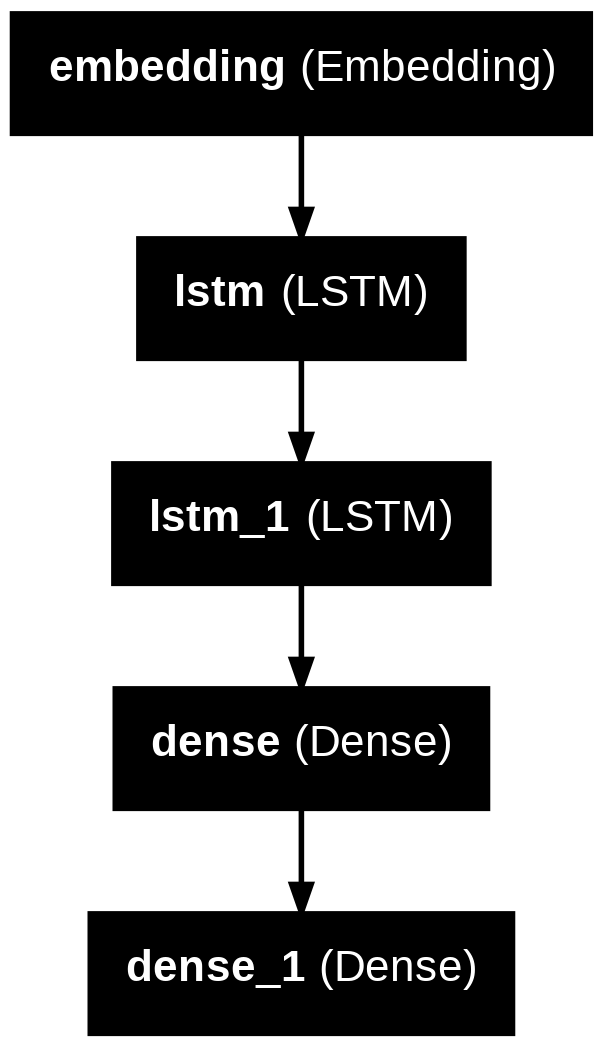

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model

# Build the model by specifying the input shape
# X.shape[0] is used to get the size of the first dimension
model.build(input_shape=(None, 1))  # input_length=1 for Embedding layer

# Alternatively, build the model by calling it on a sample batch
# model(tf.expand_dims(X[0], axis=0))

keras.utils.plot_model(model, to_file='NWP.png', show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))

In [ ]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 0.5940
Epoch 1: loss did not improve from 0.62919
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 307ms/step - loss: 0.5945 - learning_rate: 1.0000e-04
Epoch 2/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 0.6044
Epoch 2: loss did not improve from 0.62919
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 324ms/step - loss: 0.6048 - learning_rate: 1.0000e-04
Epoch 3/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - loss: 0.6038
Epoch 3: loss improved from 0.62919 to 0.62883, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - loss: 0.6042 - learning_rate: 1.0000e-04
Epoch 4/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 0.6037
Epoch 4: loss did not improve from 0.62883
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - loss: 0.6041 - learning_rate: 1.0000e-04
Epoch 5/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 0.6024
Epoch 5: loss did not improve from 0.62883
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 309ms/step - loss: 0.6029 - learning_rate: 1.0000e-04
Epoch 6/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.6135
Epoch 6: loss did not improve from 0.62883
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 321ms/step - loss: 0.6137 - learning_rate: 1.0000e-04
Epoch 7/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 0.6117
Epoch 7: loss improved from 0.62883 to 0.62756, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - loss: 0.6120 - learning_rate: 1.0000e-04
Epoch 8/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.5984
Epoch 8: loss did not improve from 0.62756
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step - loss: 0.5989 - learning_rate: 1.0000e-04
Epoch 9/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - loss: 0.5981
Epoch 9: loss did not improve from 0.62756
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 408ms/step - loss: 0.5986 - learning_rate: 1.0000e-04
Epoch 10/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 0.6077
Epoch 10: loss improved from 0.62756 to 0.62742, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 37s 346ms/step - loss: 0.6081 - learning_rate: 1.0000e-04
Epoch 11/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 0.6259
Epoch 11: loss did not improve from 0.62742
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 314ms/step - loss: 0.6259 - learning_rate: 1.0000e-04
Epoch 12/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 0.5998
Epoch 12: loss did not improve from 0.62742
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - loss: 0.6002 - learning_rate: 1.0000e-04
Epoch 13/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 0.6201
Epoch 13: loss improved from 0.62742 to 0.62721, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - loss: 0.6202 - learning_rate: 1.0000e-04
Epoch 14/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 0.6067
Epoch 14: loss did not improve from 0.62721
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 335ms/step - loss: 0.6071 - learning_rate: 1.0000e-04
Epoch 15/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - loss: 0.6022
Epoch 15: loss improved from 0.62721 to 0.62588, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - loss: 0.6026 - learning_rate: 1.0000e-04
Epoch 16/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 0.6021
Epoch 16: loss did not improve from 0.62588
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - loss: 0.6025 - learning_rate: 1.0000e-04
Epoch 17/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 0.6053
Epoch 17: loss did not improve from 0.62588
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 314ms/step - loss: 0.6056 - learning_rate: 1.0000e-04
Epoch 18/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 0.5819
Epoch 18: loss did not improve from 0.62588
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - loss: 0.5826 - learning_rate: 1.0000e-04
Epoch 19/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.5946
Epoch 19: loss did not improve from 0.62588
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - loss: 0.5951 - learning_rate: 1.0000e-04
Epoch 20/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 0.5903
Epoch 20: loss did not improve from 0.62588
61/61 ━━━━

61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 341ms/step - loss: 0.6032 - learning_rate: 1.0000e-04
Epoch 26/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 0.6106
Epoch 26: loss improved from 0.62587 to 0.62518, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 320ms/step - loss: 0.6109 - learning_rate: 1.0000e-04
Epoch 27/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - loss: 0.6007
Epoch 27: loss improved from 0.62518 to 0.62426, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 341ms/step - loss: 0.6010 - learning_rate: 1.0000e-04
Epoch 28/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - loss: 0.6125
Epoch 28: loss did not improve from 0.62426
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - loss: 0.6127 - learning_rate: 1.0000e-04
Epoch 29/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 0.6182
Epoch 29: loss did not improve from 0.62426
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 327ms/step - loss: 0.6183 - learning_rate: 1.0000e-04
Epoch 30/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - loss: 0.6064
Epoch 30: loss did not improve from 0.62426
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - loss: 0.6067 - learning_rate: 1.0000e-04
Epoch 31/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - loss: 0.6053
Epoch 31: loss did not improve from 0.62426
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step - loss: 0.6056 - learning_rate: 1.0000e-04
Epoch 32/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 0.5845
Epoch 32: loss improved from 0.62426 to 0.62393, savin

61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 325ms/step - loss: 0.5851 - learning_rate: 1.0000e-04
Epoch 33/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - loss: 0.6066
Epoch 33: loss did not improve from 0.62393
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - loss: 0.6069 - learning_rate: 1.0000e-04
Epoch 34/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 0.6097
Epoch 34: loss did not improve from 0.62393
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - loss: 0.6099 - learning_rate: 1.0000e-04
Epoch 35/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 0.6009
Epoch 35: loss improved from 0.62393 to 0.62381, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step - loss: 0.6012 - learning_rate: 1.0000e-04
Epoch 36/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - loss: 0.6044
Epoch 36: loss did not improve from 0.62381
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - loss: 0.6047 - learning_rate: 1.0000e-04
Epoch 37/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - loss: 0.6072
Epoch 37: loss improved from 0.62381 to 0.62353, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 401ms/step - loss: 0.6075 - learning_rate: 1.0000e-04
Epoch 38/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - loss: 0.6040
Epoch 38: loss did not improve from 0.62353
61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 318ms/step - loss: 0.6044 - learning_rate: 1.0000e-04
Epoch 39/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.5957
Epoch 39: loss did not improve from 0.62353
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 321ms/step - loss: 0.5961 - learning_rate: 1.0000e-04
Epoch 40/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 0.5807
Epoch 40: loss did not improve from 0.62353
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 324ms/step - loss: 0.5814 - learning_rate: 1.0000e-04
Epoch 41/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 0.6000
Epoch 41: loss did not improve from 0.62353
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step - loss: 0.6004 - learning_rate: 1.0000e-04
Epoch 42/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - loss: 0.6029
Epoch 42: loss improved from 0.62353 to 0.62255, savin

61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 343ms/step - loss: 0.6032 - learning_rate: 1.0000e-04
Epoch 43/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 0.6011
Epoch 43: loss did not improve from 0.62255
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 335ms/step - loss: 0.6014 - learning_rate: 1.0000e-04
Epoch 44/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 0.6016
Epoch 44: loss did not improve from 0.62255
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 320ms/step - loss: 0.6020 - learning_rate: 1.0000e-04
Epoch 45/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 0.5889
Epoch 45: loss did not improve from 0.62255
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - loss: 0.5895 - learning_rate: 1.0000e-04
Epoch 46/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 0.6131
Epoch 46: loss did not improve from 0.62255
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - loss: 0.6132 - learning_rate: 1.0000e-04
Epoch 47/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - loss: 0.5984
Epoch 47: loss did not improve from 0.62255
61/61 ━━━━

61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 349ms/step - loss: 0.5946 - learning_rate: 1.0000e-04
Epoch 52/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 0.5934
Epoch 52: loss did not improve from 0.62224
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 335ms/step - loss: 0.5939 - learning_rate: 1.0000e-04
Epoch 53/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 0.6006
Epoch 53: loss did not improve from 0.62224
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 316ms/step - loss: 0.6009 - learning_rate: 1.0000e-04
Epoch 54/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - loss: 0.5777
Epoch 54: loss did not improve from 0.62224
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - loss: 0.5785 - learning_rate: 1.0000e-04
Epoch 55/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 0.5997
Epoch 55: loss improved from 0.62224 to 0.62207, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - loss: 0.6000 - learning_rate: 1.0000e-04
Epoch 56/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 0.5914
Epoch 56: loss did not improve from 0.62207
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 310ms/step - loss: 0.5919 - learning_rate: 1.0000e-04
Epoch 57/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 0.5928
Epoch 57: loss did not improve from 0.62207
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step - loss: 0.5933 - learning_rate: 1.0000e-04
Epoch 58/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 0.6074
Epoch 58: loss improved from 0.62207 to 0.62152, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - loss: 0.6076 - learning_rate: 1.0000e-04
Epoch 59/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 0.5991
Epoch 59: loss did not improve from 0.62152
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 329ms/step - loss: 0.5994 - learning_rate: 1.0000e-04
Epoch 60/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 0.5828
Epoch 60: loss did not improve from 0.62152
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - loss: 0.5834 - learning_rate: 1.0000e-04
Epoch 61/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - loss: 0.5875
Epoch 61: loss improved from 0.62152 to 0.62147, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 342ms/step - loss: 0.5880 - learning_rate: 1.0000e-04
Epoch 62/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - loss: 0.5915
Epoch 62: loss did not improve from 0.62147
61/61 ━━━━━━━━━━━━━━━━━━━━ 39s 318ms/step - loss: 0.5920 - learning_rate: 1.0000e-04
Epoch 63/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 0.5758
Epoch 63: loss did not improve from 0.62147
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 340ms/step - loss: 0.5766 - learning_rate: 1.0000e-04
Epoch 64/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - loss: 0.5877
Epoch 64: loss improved from 0.62147 to 0.62090, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 335ms/step - loss: 0.5882 - learning_rate: 1.0000e-04
Epoch 65/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - loss: 0.5843
Epoch 65: loss did not improve from 0.62090
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - loss: 0.5849 - learning_rate: 1.0000e-04
Epoch 66/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 0.6029
Epoch 66: loss improved from 0.62090 to 0.62044, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 333ms/step - loss: 0.6031 - learning_rate: 1.0000e-04
Epoch 67/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.5878
Epoch 67: loss did not improve from 0.62044
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 313ms/step - loss: 0.5883 - learning_rate: 1.0000e-04
Epoch 68/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 0.5976
Epoch 68: loss did not improve from 0.62044
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 324ms/step - loss: 0.5980 - learning_rate: 1.0000e-04
Epoch 69/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 0.5881
Epoch 69: loss did not improve from 0.62044
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - loss: 0.5887 - learning_rate: 1.0000e-04
Epoch 70/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.6120
Epoch 70: loss did not improve from 0.62044
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - loss: 0.6122 - learning_rate: 1.0000e-04
Epoch 71/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 0.5938
Epoch 71: loss improved from 0.62044 to 0.62002, savin

61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - loss: 0.5942 - learning_rate: 1.0000e-04
Epoch 72/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 0.6165
Epoch 72: loss did not improve from 0.62002
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - loss: 0.6166 - learning_rate: 1.0000e-04
Epoch 73/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 0.5949
Epoch 73: loss improved from 0.62002 to 0.61958, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - loss: 0.5953 - learning_rate: 1.0000e-04
Epoch 74/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 0.6066
Epoch 74: loss did not improve from 0.61958
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 325ms/step - loss: 0.6068 - learning_rate: 1.0000e-04
Epoch 75/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.6035
Epoch 75: loss did not improve from 0.61958
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step - loss: 0.6038 - learning_rate: 1.0000e-04
Epoch 76/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.6005
Epoch 76: loss did not improve from 0.61958
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 320ms/step - loss: 0.6008 - learning_rate: 1.0000e-04
Epoch 77/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.5973
Epoch 77: loss did not improve from 0.61958
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - loss: 0.5976 - learning_rate: 1.0000e-04
Epoch 78/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 0.5905
Epoch 78: loss did not improve from 0.61958
61/61 ━━━━

61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 334ms/step - loss: 0.5950 - learning_rate: 1.0000e-04
Epoch 82/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 0.5829
Epoch 82: loss did not improve from 0.61919
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - loss: 0.5835 - learning_rate: 1.0000e-04
Epoch 83/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - loss: 0.5924
Epoch 83: loss improved from 0.61919 to 0.61910, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - loss: 0.5928 - learning_rate: 1.0000e-04
Epoch 84/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.6054
Epoch 84: loss did not improve from 0.61910
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - loss: 0.6056 - learning_rate: 1.0000e-04
Epoch 85/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 0.5952
Epoch 85: loss did not improve from 0.61910
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 336ms/step - loss: 0.5956 - learning_rate: 1.0000e-04
Epoch 86/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - loss: 0.5981
Epoch 86: loss improved from 0.61910 to 0.61901, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 340ms/step - loss: 0.5984 - learning_rate: 1.0000e-04
Epoch 87/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.6046
Epoch 87: loss did not improve from 0.61901
61/61 ━━━━━━━━━━━━━━━━━━━━ 39s 312ms/step - loss: 0.6048 - learning_rate: 1.0000e-04
Epoch 88/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 0.6056
Epoch 88: loss did not improve from 0.61901
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 328ms/step - loss: 0.6058 - learning_rate: 1.0000e-04
Epoch 89/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 0.5822
Epoch 89: loss improved from 0.61901 to 0.61870, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - loss: 0.5828 - learning_rate: 1.0000e-04
Epoch 90/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 0.5889
Epoch 90: loss improved from 0.61870 to 0.61868, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - loss: 0.5893 - learning_rate: 1.0000e-04
Epoch 91/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 0.6183
Epoch 91: loss improved from 0.61868 to 0.61854, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 323ms/step - loss: 0.6183 - learning_rate: 1.0000e-04
Epoch 92/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - loss: 0.5970
Epoch 92: loss improved from 0.61854 to 0.61835, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 333ms/step - loss: 0.5973 - learning_rate: 1.0000e-04
Epoch 93/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.5936
Epoch 93: loss did not improve from 0.61835
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - loss: 0.5941 - learning_rate: 1.0000e-04
Epoch 94/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 0.5957
Epoch 94: loss did not improve from 0.61835
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - loss: 0.5961 - learning_rate: 1.0000e-04
Epoch 95/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - loss: 0.5928
Epoch 95: loss did not improve from 0.61835
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 310ms/step - loss: 0.5932 - learning_rate: 1.0000e-04
Epoch 96/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 0.6076
Epoch 96: loss improved from 0.61835 to 0.61811, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 333ms/step - loss: 0.6078 - learning_rate: 1.0000e-04
Epoch 97/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 0.6028
Epoch 97: loss did not improve from 0.61811
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 309ms/step - loss: 0.6031 - learning_rate: 1.0000e-04
Epoch 98/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 0.5904
Epoch 98: loss did not improve from 0.61811
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 324ms/step - loss: 0.5909 - learning_rate: 1.0000e-04
Epoch 99/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.5789
Epoch 99: loss did not improve from 0.61811
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - loss: 0.5795 - learning_rate: 1.0000e-04
Epoch 100/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 0.5681
Epoch 100: loss did not improve from 0.61811
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - loss: 0.5689 - learning_rate: 1.0000e-04
Epoch 101/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 0.5763
Epoch 101: loss did not improve from 0.61811
61/61 

61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 335ms/step - loss: 0.5859 - learning_rate: 1.0000e-04
Epoch 103/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 0.5954
Epoch 103: loss did not improve from 0.61741
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 312ms/step - loss: 0.5957 - learning_rate: 1.0000e-04
Epoch 104/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 0.5782
Epoch 104: loss did not improve from 0.61741
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - loss: 0.5789 - learning_rate: 1.0000e-04
Epoch 105/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 0.5964
Epoch 105: loss did not improve from 0.61741
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 310ms/step - loss: 0.5968 - learning_rate: 1.0000e-04
Epoch 106/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 0.5614
Epoch 106: loss improved from 0.61741 to 0.61682, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 337ms/step - loss: 0.5623 - learning_rate: 1.0000e-04
Epoch 107/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 0.5950
Epoch 107: loss did not improve from 0.61682
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 328ms/step - loss: 0.5954 - learning_rate: 1.0000e-04
Epoch 108/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 0.5927
Epoch 108: loss did not improve from 0.61682
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 325ms/step - loss: 0.5931 - learning_rate: 1.0000e-04
Epoch 109/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 0.5970
Epoch 109: loss did not improve from 0.61682
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - loss: 0.5973 - learning_rate: 1.0000e-04
Epoch 110/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - loss: 0.5769
Epoch 110: loss did not improve from 0.61682
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - loss: 0.5776 - learning_rate: 1.0000e-04
Epoch 111/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 0.5980
Epoch 111: loss did not improve from 0.61682


61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - loss: 0.6030 - learning_rate: 1.0000e-04
Epoch 114/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 0.5858
Epoch 114: loss did not improve from 0.61667
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 316ms/step - loss: 0.5863 - learning_rate: 1.0000e-04
Epoch 115/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - loss: 0.6105
Epoch 115: loss did not improve from 0.61667
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 343ms/step - loss: 0.6106 - learning_rate: 1.0000e-04
Epoch 116/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 0.6142
Epoch 116: loss did not improve from 0.61667
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - loss: 0.6143 - learning_rate: 1.0000e-04
Epoch 117/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - loss: 0.5848
Epoch 117: loss did not improve from 0.61667
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 339ms/step - loss: 0.5853 - learning_rate: 1.0000e-04
Epoch 118/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 0.6102
Epoch 118: loss did not improve from 0.61667


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 329ms/step - loss: 0.5936 - learning_rate: 1.0000e-04
Epoch 120/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 0.6004
Epoch 120: loss improved from 0.61645 to 0.61630, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - loss: 0.6006 - learning_rate: 1.0000e-04
Epoch 121/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - loss: 0.5817
Epoch 121: loss did not improve from 0.61630
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 332ms/step - loss: 0.5822 - learning_rate: 1.0000e-04
Epoch 122/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 0.5973
Epoch 122: loss did not improve from 0.61630
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - loss: 0.5976 - learning_rate: 1.0000e-04
Epoch 123/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 0.5860
Epoch 123: loss improved from 0.61630 to 0.61624, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 344ms/step - loss: 0.5865 - learning_rate: 1.0000e-04
Epoch 124/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.6078
Epoch 124: loss did not improve from 0.61624
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - loss: 0.6080 - learning_rate: 1.0000e-04
Epoch 125/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - loss: 0.5875
Epoch 125: loss improved from 0.61624 to 0.61608, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 346ms/step - loss: 0.5880 - learning_rate: 1.0000e-04
Epoch 126/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 0.5868
Epoch 126: loss did not improve from 0.61608
61/61 ━━━━━━━━━━━━━━━━━━━━ 39s 319ms/step - loss: 0.5873 - learning_rate: 1.0000e-04
Epoch 127/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - loss: 0.5931
Epoch 127: loss improved from 0.61608 to 0.61519, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 341ms/step - loss: 0.5935 - learning_rate: 1.0000e-04
Epoch 128/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - loss: 0.5952
Epoch 128: loss did not improve from 0.61519
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 332ms/step - loss: 0.5956 - learning_rate: 1.0000e-04
Epoch 129/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 0.5949
Epoch 129: loss did not improve from 0.61519
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 315ms/step - loss: 0.5953 - learning_rate: 1.0000e-04
Epoch 130/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 0.5928
Epoch 130: loss did not improve from 0.61519
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 318ms/step - loss: 0.5932 - learning_rate: 1.0000e-04
Epoch 131/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - loss: 0.5845
Epoch 131: loss did not improve from 0.61519
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 341ms/step - loss: 0.5850 - learning_rate: 1.0000e-04
Epoch 132/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - loss: 0.6107
Epoch 132: loss did not improve from 0.61519


61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 348ms/step - loss: 0.5840 - learning_rate: 1.0000e-04
Epoch 137/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 0.5824
Epoch 137: loss did not improve from 0.61510
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 318ms/step - loss: 0.5829 - learning_rate: 1.0000e-04
Epoch 138/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - loss: 0.5792
Epoch 138: loss did not improve from 0.61510
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 333ms/step - loss: 0.5798 - learning_rate: 1.0000e-04
Epoch 139/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - loss: 0.6054
Epoch 139: loss did not improve from 0.61510
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 318ms/step - loss: 0.6056 - learning_rate: 1.0000e-04
Epoch 140/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 0.5843
Epoch 140: loss did not improve from 0.61510
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - loss: 0.5848 - learning_rate: 1.0000e-04
Epoch 141/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 0.5812
Epoch 141: loss did not improve from 0.61510


61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/step - loss: 0.5989 - learning_rate: 1.0000e-04
Epoch 146/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 0.5879
Epoch 146: loss improved from 0.61495 to 0.61482, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - loss: 0.5883 - learning_rate: 1.0000e-04
Epoch 147/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - loss: 0.5811
Epoch 147: loss did not improve from 0.61482
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 333ms/step - loss: 0.5817 - learning_rate: 1.0000e-04
Epoch 148/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.5782
Epoch 148: loss did not improve from 0.61482
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - loss: 0.5788 - learning_rate: 1.0000e-04
Epoch 149/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - loss: 0.5983
Epoch 149: loss did not improve from 0.61482
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 331ms/step - loss: 0.5986 - learning_rate: 1.0000e-04
Epoch 150/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.6044
Epoch 150: loss did not improve from 0.61482
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - loss: 0.6046 - learning_rate: 1.0000e-04


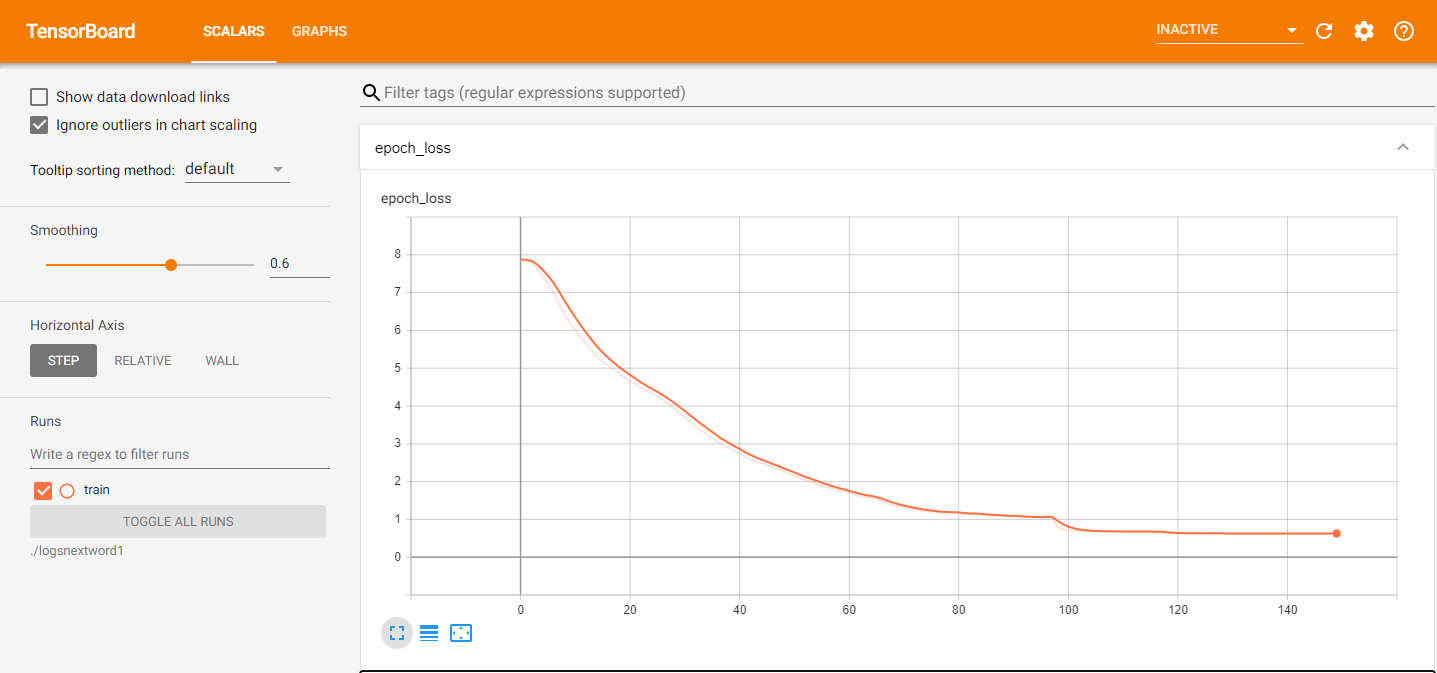

In [ ]:
from IPython.display import Image
pil_img = Image(filename='graph2.png')
display(pil_img)